In [1]:
import omicverse as ov
from omicverse.utils import mde
import scanpy as sc
import scvelo as scv
ov.utils.ov_plot_set()

In [2]:
adata=scv.datasets.dentategyrus()
adata

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

In [3]:
adata.obs['celltype']=adata.obs['clusters'].copy()

In [4]:
import numpy as np
import pandas as pd
bulk=pd.read_csv('data/GSE74985_mergedCount.txt.gz',index_col=0,sep='\t')
bulk=ov.bulk.Matrix_ID_mapping(bulk,'genesets/pair_GRCm39.tsv')
bulk.head()

dg_d_1  dg_d_2  dg_d_3  dg_v_1  dg_v_2  dg_v_3  ca4_1  ca4_2  ca4_3  \
Cebpzos      94       9      47      69     126      65    298    261    223   
Gm14216       0       0       0       0       0       0      0      0      0   
Tekt4         0       0       0       0       0       0     25      0      0   
Gm24665       0       0       0       0       0       0      0      0      0   
Gm11712       0       8       0       0       0       0      0      0      0   

         ca3_d_1  ...  ca3_v_3  ca2_1  ca2_2  ca2_3  ca1_d_1  ca1_d_2  \
Cebpzos      137  ...      186    108    173     68      157      127   
Gm14216        0  ...        0      0      0      0        0        0   
Tekt4          0  ...        0      0      8      0        0        0   
Gm24665        0  ...        0      0      0      0        0        0   
Gm11712        0  ...        0      0      0      0        0        0   

         ca1_d_3  ca1_v_1  ca1_v_2  ca1_v_3  
Cebpzos      101       94       22       71  
Gm14216        0        0        0        0  
Tekt4          0        0        0        0  
Gm24665        0        0        0        0  
Gm11712        0        0        0        0  

[5 rows x 24 columns]

In [5]:
#raw_columns=bulk.columns.tolist()
#new_columns=[i+'-'+j for i, j in zip(bulk.iloc[0],raw_columns)]

In [23]:
bulktb=ov.bulk2single.BulkTrajBlend(bulk_seq=bulk,single_seq=adata,
                                    bulk_group=['dg_d_1','dg_d_2','dg_d_3'],
                                    celltype_key='celltype',)
#bulktb.bulk_preprocess_lazy()
#bulktb.single_preprocess_lazy()

In [ ]:
bulktb.vae_model.bulk_data.T

In [56]:
bulktb.vae_model.sc_ref

index             Lypla1  Tcea1  Atp6v1h  Rb1cc1  St18  Pcmtd1   Rrs1  Adhfe1  \
Granule mature       4.0   91.0     94.0   290.0  31.0    95.0  109.0     0.0   
GABA                 1.0   13.0     22.0    30.0   0.0     8.0   16.0     1.0   
nIPC                 1.0    8.0      0.0     1.0   0.0     0.0    7.0     0.0   
Astrocytes           0.0   46.0      5.0    13.0   0.0     5.0   19.0    37.0   
Endothelial          5.0    3.0     14.0     7.0   0.0    11.0   11.0     0.0   
Neuroblast           0.0   51.0    118.0    96.0   5.0    51.0   99.0     0.0   
Cajal Retzius        0.0    4.0      4.0     8.0   0.0     0.0    5.0     0.0   
Radial Glia-like     0.0   23.0      2.0     9.0   0.0     1.0    9.0     2.0   
OL                   0.0    3.0      3.0     4.0   3.0     3.0    3.0     0.0   
OPC                  0.0    4.0      2.0     4.0   0.0     2.0    7.0     0.0   
Mossy                0.0   13.0     48.0    47.0   4.0    17.0   16.0     0.0   
Granule immature     2.0   58.0     92.0   251.0  34.0    92.0  121.0     0.0   
Microglia            1.0    3.0      5.0     5.0   0.0     3.0    7.0     0.0   
Cck-Tox              0.0    5.0      4.0     8.0   1.0     4.0    3.0     0.0   

index             3110035E14Rik  Sgk3  ...  Tlr7  Prps2  Frmpd4  Msl3  Hccs  \
Granule mature             70.0   7.0  ...   1.0   46.0    51.0  35.0   1.0   
GABA                        3.0   0.0  ...   0.0    9.0    17.0   4.0   0.0   
nIPC                        0.0   0.0  ...   0.0    0.0     0.0   0.0   0.0   
Astrocytes                  1.0   2.0  ...   0.0    0.0     0.0   2.0   0.0   
Endothelial                 0.0   6.0  ...   0.0    1.0     3.0   5.0   0.0   
Neuroblast                 66.0   3.0  ...   0.0   29.0     1.0  16.0   0.0   
Cajal Retzius               0.0   0.0  ...   0.0    0.0     0.0   1.0   0.0   
Radial Glia-like            0.0   0.0  ...   0.0    0.0     0.0   2.0   0.0   
OL                          0.0   3.0  ...   0.0    2.0     0.0   5.0   0.0   
OPC                        64.0   2.0  ...   0.0    0.0     0.0   3.0   0.0   
Mossy                      64.0   0.0  ...   0.0    6.0    18.0  25.0   0.0   
Granule immature          209.0   8.0  ...   0.0   42.0    64.0  25.0   0.0   
Microglia                   0.0   3.0  ...   1.0    5.0     0.0   3.0   0.0   
Cck-Tox                     0.0   1.0  ...   0.0    1.0     2.0   2.0   0.0   

index             Kdm5d  Eif2s3y  Erdr1   Uty  Ddx3y  
Granule mature     22.0    167.0  210.0  12.0  120.0  
GABA                0.0      3.0   23.0   2.0   13.0  
nIPC                0.0      1.0    7.0   0.0    1.0  
Astrocytes          2.0      7.0   11.0   0.0   10.0  
Endothelial         0.0      5.0   15.0   0.0    3.0  
Neuroblast          0.0      1.0  118.0   0.0    5.0  
Cajal Retzius       0.0      2.0    4.0   0.0    1.0  
Radial Glia-like    0.0      3.0    4.0   0.0    0.0  
OL                  2.0      6.0    1.0   0.0   13.0  
OPC                 0.0      3.0   12.0   0.0    2.0  
Mossy               4.0      2.0   31.0   1.0    9.0  
Granule immature   14.0     62.0  232.0   6.0   70.0  
Microglia           1.0      8.0   11.0   0.0    2.0  
Cck-Tox             1.0      3.0    6.0   1.0    2.0  

[14 rows x 13913 columns]

Reading single-cell dataset, this may take 1 min
Reading dataset is done
Normalizing raw single cell data with scanpy.pp.normalize_total
Generating cell fractions using Dirichlet distribution without prior info (actually random)
RANDOM cell fractions is generated
You set sparse as True, some cell's fraction will be zero, the probability is 0.5
Sampling cells to compose pseudo-bulk data


5000it [00:14, 340.24it/s]


Sampling is done
Reading training data
Reading is done
Reading test data
Reading test data is done
Using counts data to train model
Cutting variance...
Finding intersected genes...
Intersected gene number is  12227
Scaling...


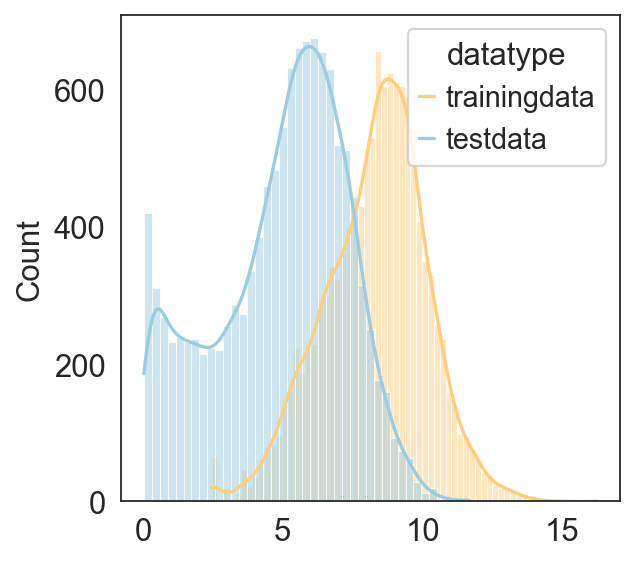

Using minmax scaler...


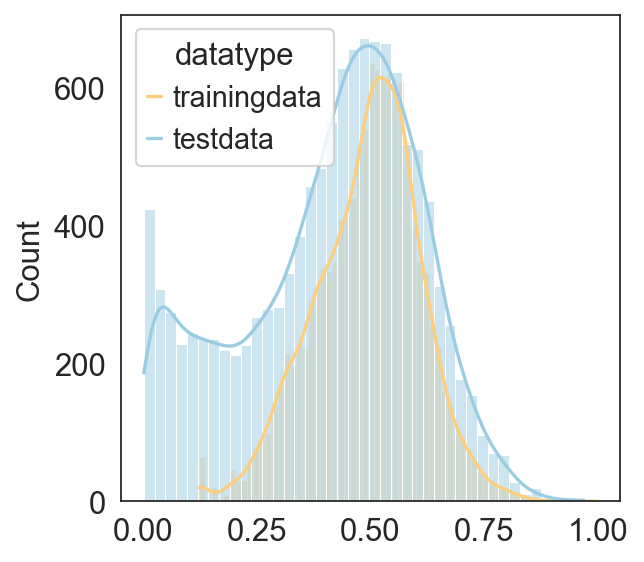

training data shape is  (5000, 12227) 
test data shape is  (24, 12227)
train model256 now


100%|██████████| 128/128 [00:36<00:00,  3.49it/s]


train model512 now


100%|██████████| 128/128 [00:38<00:00,  3.29it/s]


train model1024 now


100%|██████████| 128/128 [00:44<00:00,  2.91it/s]

Training of Scaden is done


In [21]:
from omicverse.tape.deconvolution import ScadenDeconvolution
Pred = ScadenDeconvolution(bulktb.sc_ref, 
                           bulktb.bulk_ref, sep='\t',
                           batch_size=128, epochs=128)

In [55]:
neuron_dict={
    'dg_v':'Ventral DG granule',
    'dg_d':'Dorsal DG granule',
    'ca4':'Dorsal DG mossy',
    'ca3_d':'Dorsal CA3 pyramidal',
    'ca3_v':'Ventral CA3 pyramidal',
    'ca2':'Dorsal CA2 pyramidal',
    'ca1_d':'Dorsal CA1 pyramidal',
    'ca1_v':'Ventral CA1 pyramidal'
}

In [59]:
Pred1=Pred.copy()
Pred1.index=[neuron_dict[i[:-2]]+i[-2:] for i in Pred1.index]

In [63]:
adata

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'celltype'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

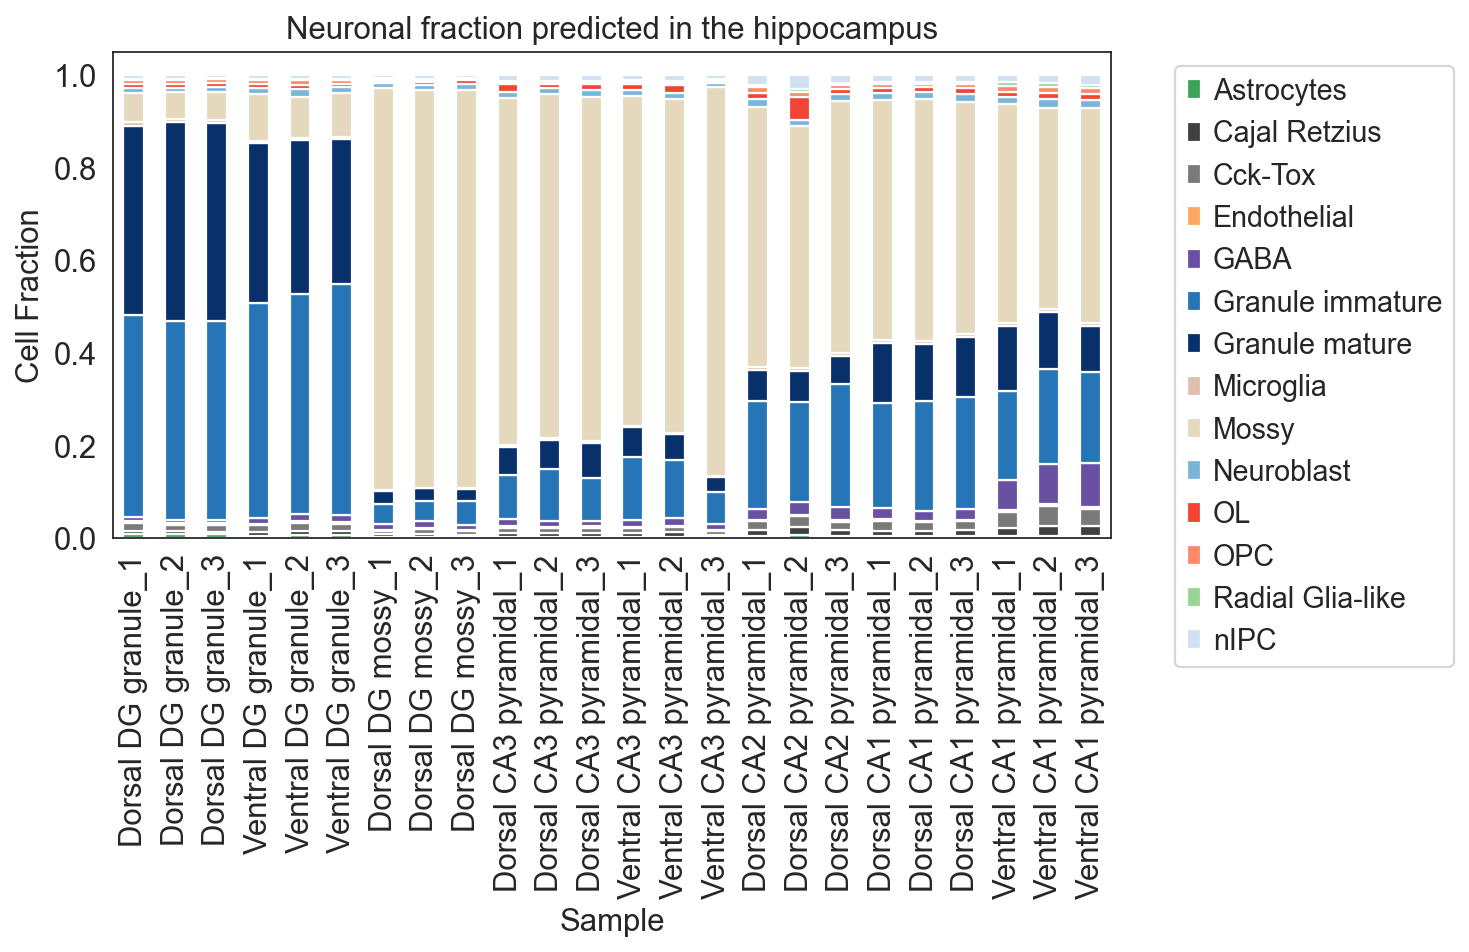

In [65]:
import matplotlib.pyplot as plt
ax = Pred1.plot(kind='bar', stacked=True, figsize=(8, 4),
               color=adata.uns['clusters_colors'])
ax.set_xlabel('Sample')
ax.set_ylabel('Cell Fraction')
ax.set_title('Neuronal fraction predicted in the hippocampus')
plt.legend(bbox_to_anchor=(1.05, 1),ncol=1,)
plt.savefig('figures/fraction_dg.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/fraction_dg.pdf',dpi=300,bbox_inches='tight')


In [61]:
Pred

Astrocytes  Cajal Retzius   Cck-Tox  Endothelial      GABA  \
dg_d_1     0.003454       0.003948  0.009357     0.002859  0.012336   
dg_d_2     0.003916       0.003515  0.007519     0.003304  0.009752   
dg_d_3     0.004144       0.002860  0.006722     0.003051  0.010817   
dg_v_1     0.002409       0.004116  0.008602     0.001820  0.015303   
dg_v_2     0.003171       0.004666  0.009958     0.002362  0.017369   
dg_v_3     0.002918       0.004056  0.008836     0.002150  0.018081   
ca4_1      0.002879       0.002790  0.006751     0.001079  0.018472   
ca4_2      0.001400       0.003635  0.008893     0.001116  0.019224   
ca4_3      0.001376       0.003139  0.008085     0.001247  0.015884   
ca3_d_1    0.002597       0.005321  0.013027     0.001774  0.019702   
ca3_d_2    0.002830       0.004191  0.010921     0.001945  0.015157   
ca3_d_3    0.002653       0.004828  0.011999     0.002149  0.013845   
ca3_v_1    0.002765       0.004579  0.011505     0.001628  0.020143   
ca3_v_2    0.002686       0.004812  0.011924     0.001488  0.023306   
ca3_v_3    0.001868       0.002817  0.007452     0.001292  0.018986   
ca2_1      0.003347       0.008017  0.016527     0.002278  0.026665   
ca2_2      0.005819       0.012301  0.021897     0.001770  0.034628   
ca2_3      0.003442       0.007133  0.015194     0.002350  0.034517   
ca1_d_1    0.002537       0.006788  0.015533     0.002175  0.029556   
ca1_d_2    0.002126       0.006026  0.014687     0.001712  0.026341   
ca1_d_3    0.002556       0.007231  0.016261     0.001853  0.030968   
ca1_v_1    0.003205       0.010111  0.024378     0.002270  0.078780   
ca1_v_2    0.003591       0.012549  0.029038     0.002560  0.104313   
ca1_v_3    0.002883       0.011194  0.027257     0.002373  0.111842   

         Granule immature  Granule mature  Microglia     Mossy  Neuroblast  \
dg_d_1           0.461526        0.417283   0.004879  0.052544    0.015530   
dg_d_2           0.466926        0.412037   0.005377  0.056840    0.017185   
dg_d_3           0.462188        0.418509   0.005469  0.055019    0.018771   
dg_v_1           0.497687        0.355752   0.002355  0.082585    0.015510   
dg_v_2           0.465327        0.370305   0.002462  0.083486    0.024402   
dg_v_3           0.493939        0.345510   0.002403  0.089657    0.018178   
ca4_1            0.034368        0.027254   0.000810  0.886867    0.010418   
ca4_2            0.029884        0.027401   0.001030  0.886101    0.010974   
ca4_3            0.037642        0.030845   0.001379  0.878498    0.012820   
ca3_d_1          0.085090        0.062638   0.002455  0.769276    0.017516   
ca3_d_2          0.100025        0.068152   0.002806  0.760247    0.017747   
ca3_d_3          0.085186        0.083654   0.002652  0.756972    0.019730   
ca3_v_1          0.107181        0.072564   0.001730  0.742473    0.017530   
ca3_v_2          0.085260        0.063004   0.001478  0.766634    0.018903   
ca3_v_3          0.049252        0.035740   0.001120  0.860761    0.012104   
ca2_1            0.239714        0.097863   0.003667  0.553532    0.021614   
ca2_2            0.237459        0.093446   0.003013  0.515221    0.018064   
ca2_3            0.257991        0.094380   0.003613  0.538107    0.019660   
ca1_d_1          0.220536        0.166322   0.003325  0.511063    0.021557   
ca1_d_2          0.229601        0.175903   0.003214  0.500287    0.020146   
ca1_d_3          0.260519        0.169409   0.003286  0.466014    0.019869   
ca1_v_1          0.165128        0.154860   0.003033  0.511501    0.018780   
ca1_v_2          0.180879        0.144794   0.004065  0.460886    0.022654   
ca1_v_3          0.171259        0.126225   0.003296  0.488535    0.021625   

               OL       OPC  Radial Glia-like      nIPC  
dg_d_1   0.004603  0.003991          0.002352  0.005338  
dg_d_2   0.003694  0.003123          0.002386  0.004424  
dg_d_3   0.003174  0.002845          0.002305  0.004126  
dg_v_1   0.003522  0.005125          0.001737  0.0

Reading single-cell dataset, this may take 1 min
Reading dataset is done
Normalizing raw single cell data with scanpy.pp.normalize_total
Generating cell fractions using Dirichlet distribution without prior info (actually random)
RANDOM cell fractions is generated
You set sparse as True, some cell's fraction will be zero, the probability is 0.5
Sampling cells to compose pseudo-bulk data


5000it [00:13, 372.96it/s]


Sampling is done
Reading training data
Reading is done
Reading test data
Reading test data is done
Using counts data to train model
Cutting variance...
Finding intersected genes...
Intersected gene number is  12227
Scaling...


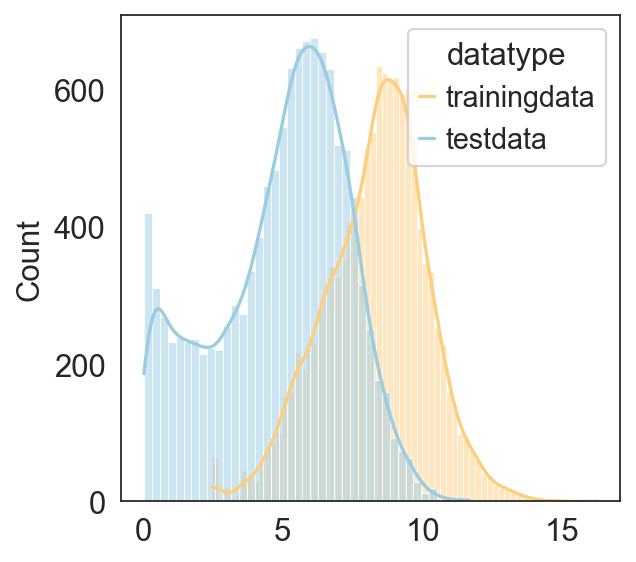

Using minmax scaler...


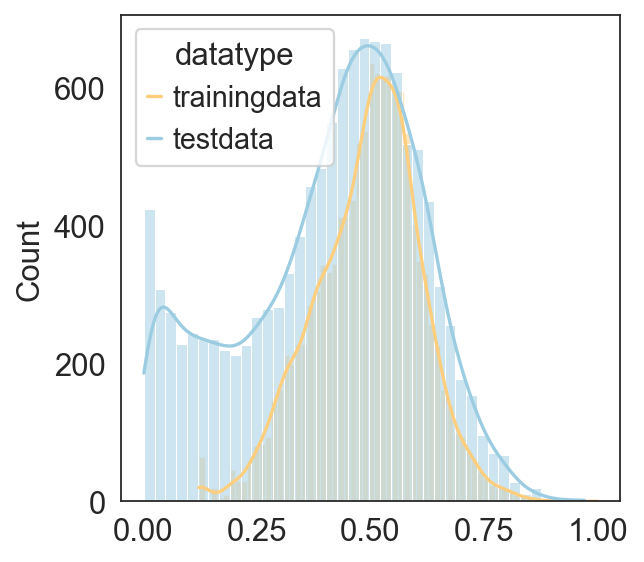

training data shape is  (5000, 12227) 
test data shape is  (24, 12227)
train model256 now


100%|██████████| 128/128 [00:35<00:00,  3.64it/s]


train model512 now


100%|██████████| 128/128 [00:38<00:00,  3.37it/s]


train model1024 now


100%|██████████| 128/128 [00:43<00:00,  2.93it/s]

Training of Scaden is done
Predicted Total Cell Num: 2457.268449380651
......drop duplicates index in bulk data
......deseq2 normalize the bulk data
......log10 the bulk data
......calculate the mean of each group
......normalize the single data
normalizing counts per cell
    finished (0:00:00)


......log1p the single data
......prepare the input of bulk2single
...loading data


In [24]:
bulktb.vae_configure(cell_target_num=None)

In [8]:
bulktb.vae_train(batch_size=256,
    learning_rate=1e-4,
    hidden_size=256,
    epoch_num=3500,
    vae_save_dir='model',
    vae_save_name='dg_vae',
    generate_save_dir='output',
    generate_save_name='dg')

#bulktb.vae_load('model/dgd_vae.pth')

...begin vae training


Train Epoch: 2908:  83%|████████▎ | 2909/3500 [13:14<02:41,  3.66it/s, loss=1.4178, min_loss=1.4069]

Early stopping at epoch 2910...
min loss = 1.4068658649921417
...vae training done!


...save trained vae in model/dg_vae.pth.


In [48]:
adata

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'celltype'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

In [49]:
adata1=adata[:,~adata.var_names.str.contains('Lypla1')].copy()
adata1.var.shape

(13912, 0)

In [41]:
adata.var_names

Index(['Lypla1', 'Tcea1', 'Atp6v1h', 'Rb1cc1', 'St18', 'Pcmtd1', 'Rrs1',
       'Adhfe1', '3110035E14Rik', 'Sgk3',
       ...
       'Tlr7', 'Prps2', 'Frmpd4', 'Msl3', 'Hccs', 'Kdm5d', 'Eif2s3y', 'Erdr1',
       'Uty', 'Ddx3y'],
      dtype='object', name='index', length=13913)

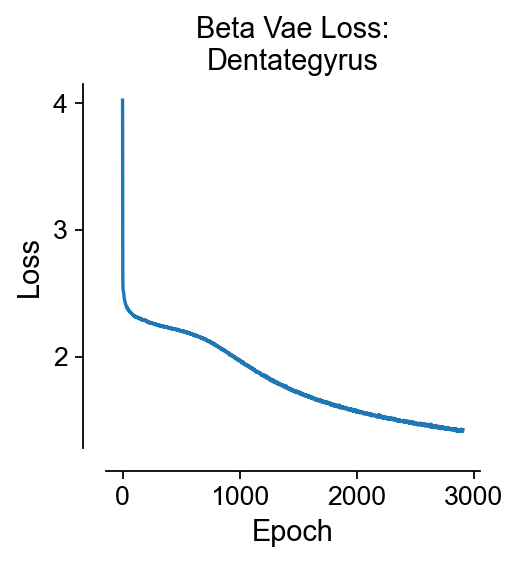

In [85]:
fig,ax=bulktb.vae_model.plot_loss(figsize=(3,3))

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.title('Beta Vae Loss:\nDentategyrus',fontsize=13)
plt.xlabel('Epoch',fontsize=13)
plt.ylabel('Loss',fontsize=13)

plt.savefig('figures/loss_vae_dg.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/loss_vae_dg.pdf',dpi=300,bbox_inches='tight')


In [26]:
bulktb.vae_load('model/dg_vae.pth')

loading model from model/dg_vae.pth
loading model from model/dg_vae.pth


In [27]:
test_adata=bulktb.vae_generate(leiden_size=50)

...generating


generating: 100%|██████████| 4907/4907 [00:00<00:00, 18556.19it/s]


generated done!
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    on highly variable genes
    with n_comps=100
    finished (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 25 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)
The filter leiden is  ['16', '17', '18', '19', '20', '21', '22', '23', '24']


In [28]:
test_adata.uns['celltype_colors']=adata.uns['clusters_colors']

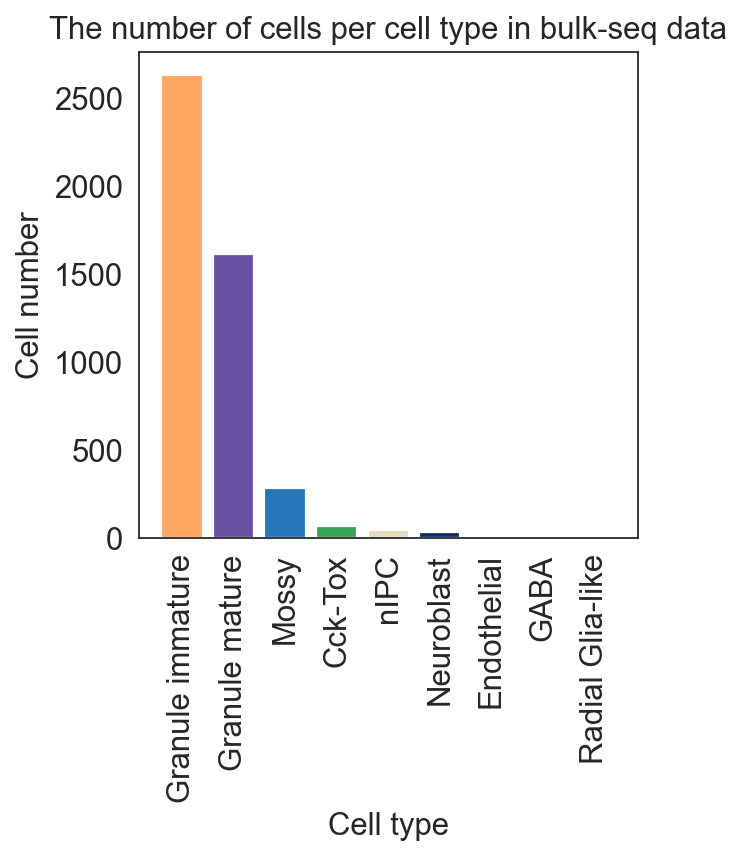

In [29]:
import matplotlib.pyplot as plt
ov.bulk2single.bulk2single_plot_cellprop(test_adata,
                                         celltype_key='celltype',
                                        )
plt.grid(False)

In [30]:
test_adata

AnnData object with n_obs × n_vars = 4685 × 12953
    obs: 'celltype', 'leiden'
    uns: 'hvg', 'pca', 'neighbors', 'leiden', 'noisy_leiden', 'celltype_colors'
    obsm: 'X_pca'
    obsp: 'distances', 'connectivities'

In [31]:
bulktb.gnn_configure(max_epochs=2000)

torch have been install version: 2.0.1


In [32]:
bulktb.gnn_train()

Epoch  950, loss.full = 0.2460, nmi = 0.10:   0%|          | 0/2000 [00:53<?, ?it/s]


Breaking due to early stopping at epoch 950
Final nmi = 0.107
......add nocd result to adata.obs
...save trained gnn in save_model/gnn.pth.


In [33]:
bulktb.nocd_obj.adata.obs['leiden'].value_counts()[:20]

0     438
1     413
2     384
3     377
4     360
5     359
6     331
7     329
8     326
9     289
10    283
11    253
12    188
13    158
14     98
15     97
Name: leiden, dtype: int64

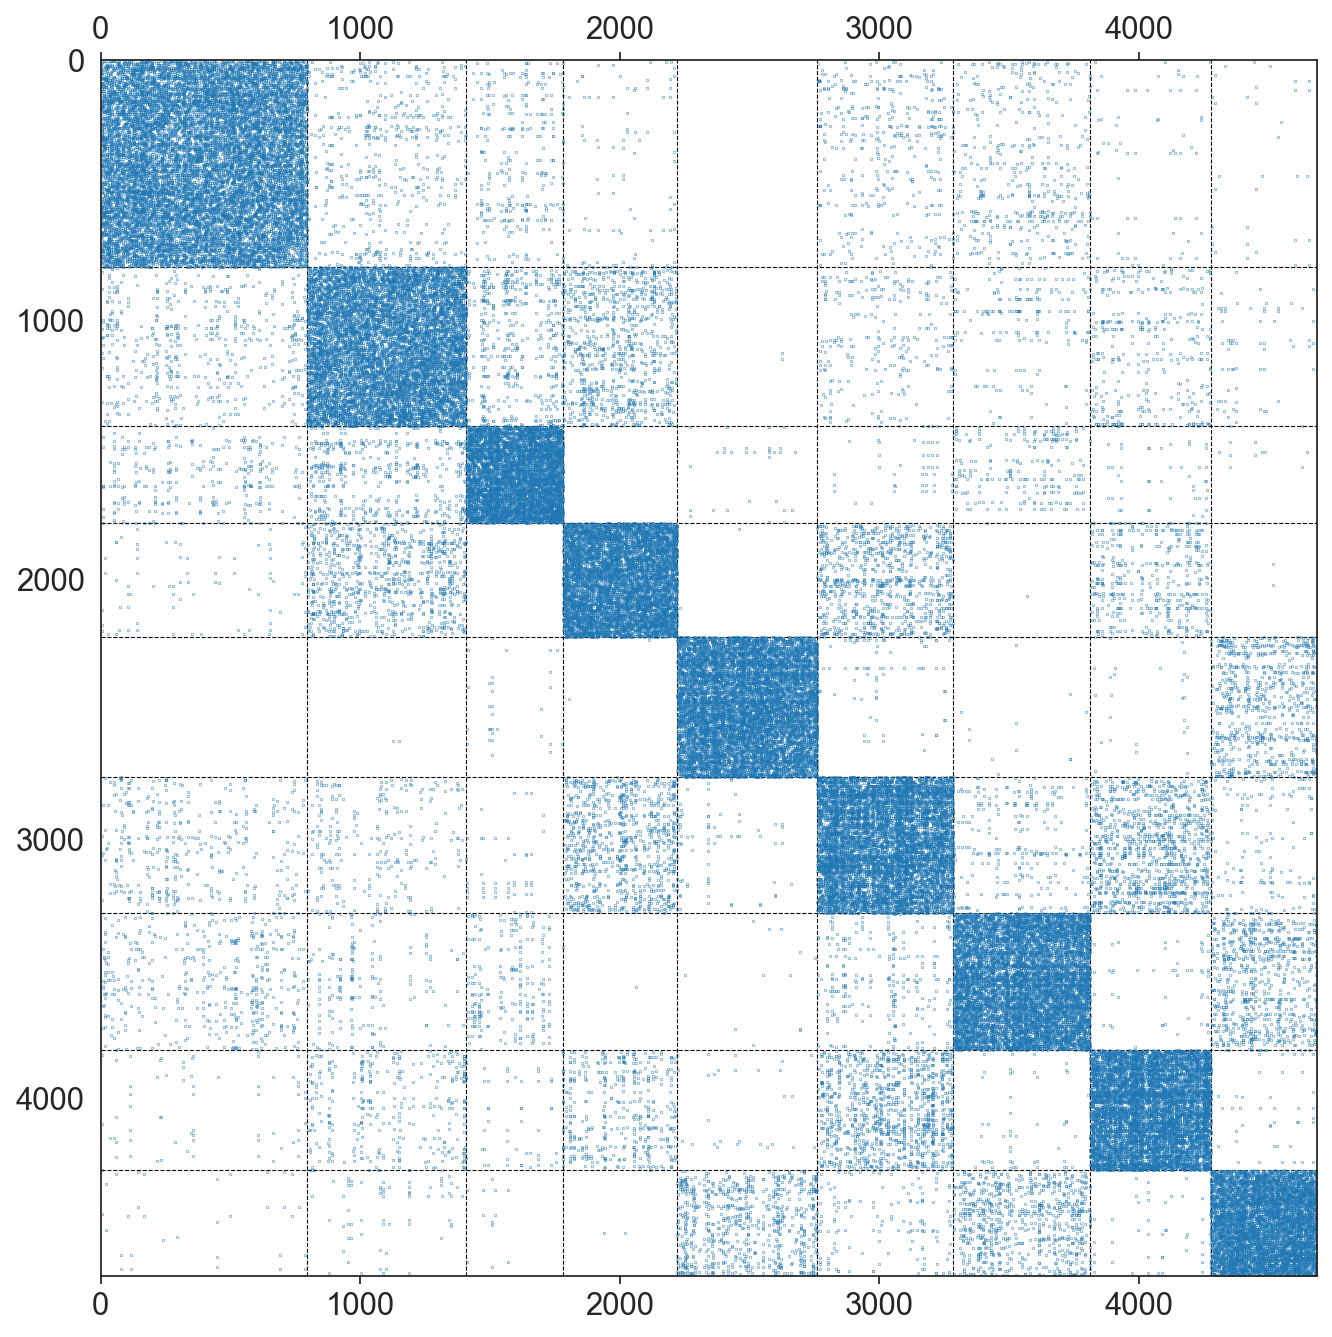

In [34]:
bulktb.nocd_obj.GNN_plot()

In [35]:
bulktb.nocd_obj.adata.uns['clusters_colors']=adata.uns['clusters_colors']

In [36]:
bulktb.nocd_obj.adata.uns['celltype_colors']=adata.uns['clusters_colors']

In [37]:
sc.tl.pca(bulktb.nocd_obj.adata, n_comps=100)
sc.pp.neighbors(bulktb.nocd_obj.adata, use_rep="X_pca")
sc.tl.umap(bulktb.nocd_obj.adata)

computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


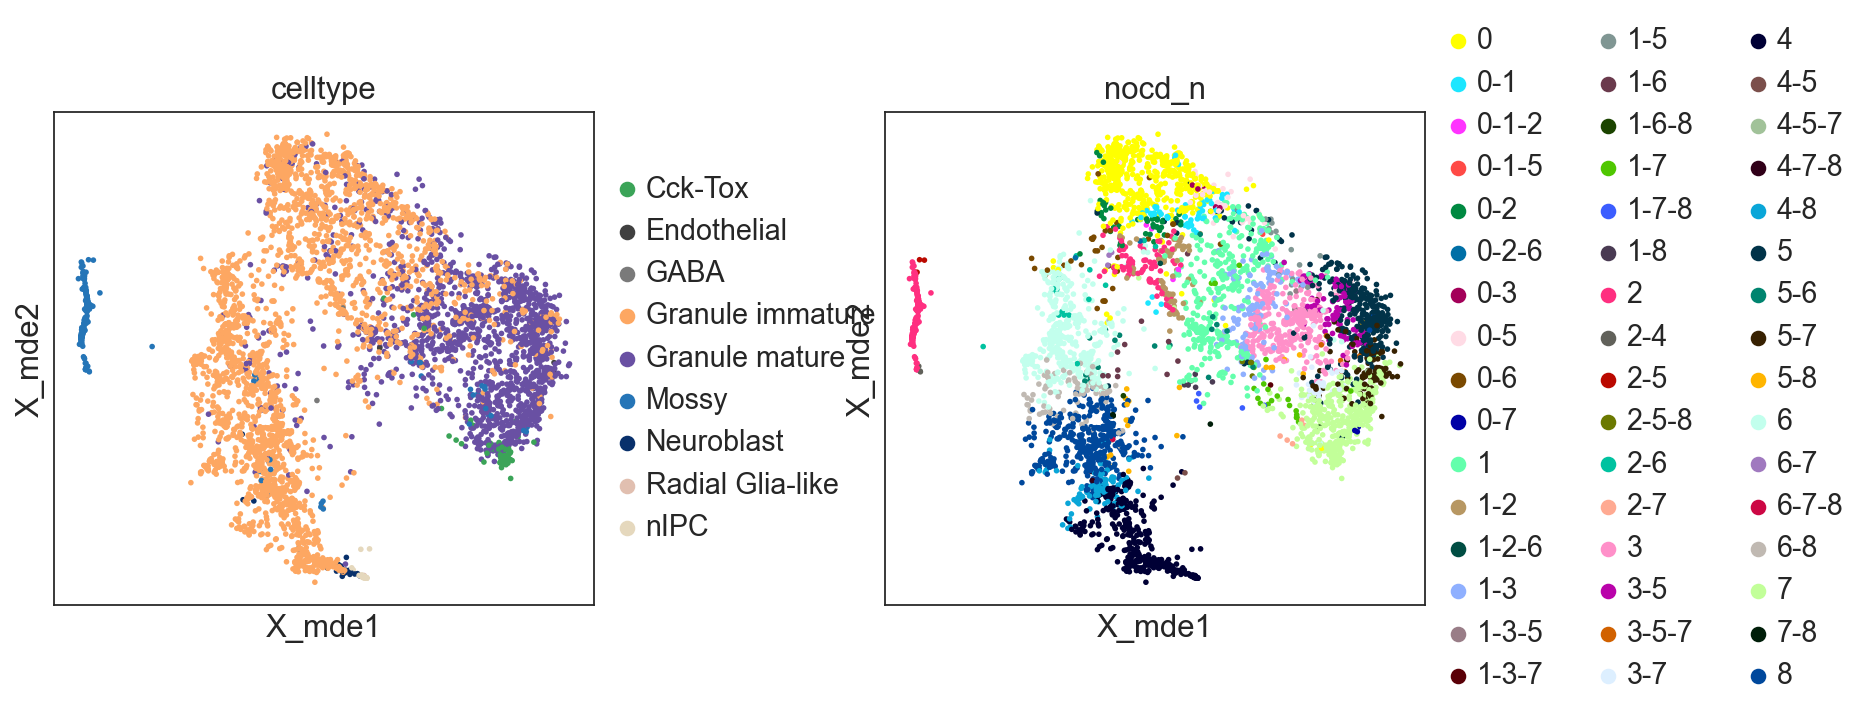

In [38]:
bulktb.nocd_obj.adata.obsm["X_mde"] = mde(bulktb.nocd_obj.adata.obsm["X_pca"])
sc.pl.embedding(bulktb.nocd_obj.adata,basis='X_mde',color=['celltype','nocd_n'],wspace=0.4,
          )

In [39]:
bulktb.nocd_obj.adata.var_names

Index(['Tcea1', 'Rb1cc1', 'Unc50', 'Cnot11', 'Tmeff2', 'Hibch', 'Coq10b',
       'Cyp20a1', 'Igfbp2', 'Ctdsp1',
       ...
       'Itm2a', 'Tceal5', 'Bex1', 'Psmd10', 'Maged2', 'Mageh1', 'Prdx4',
       'Cnksr2', 'Rab9', 'Msl3'],
      dtype='object', length=1413)

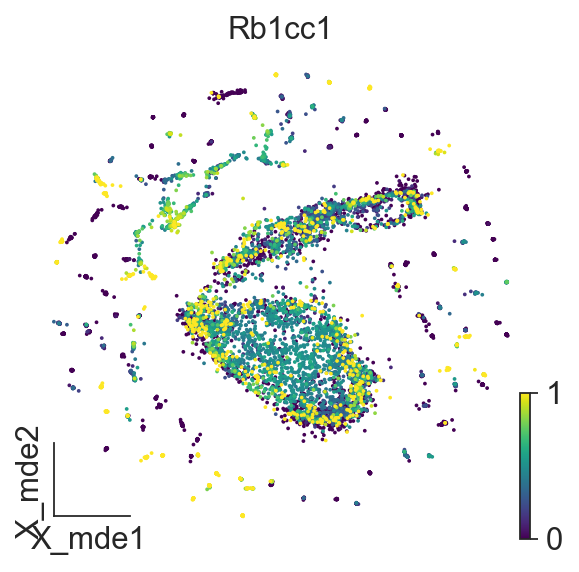

In [43]:
ov.utils.embedding(bulktb.nocd_obj.adata,
                  basis='X_mde',color=['Rb1cc1'],frameon='small',
                  cmap='viridis',vmax=1)

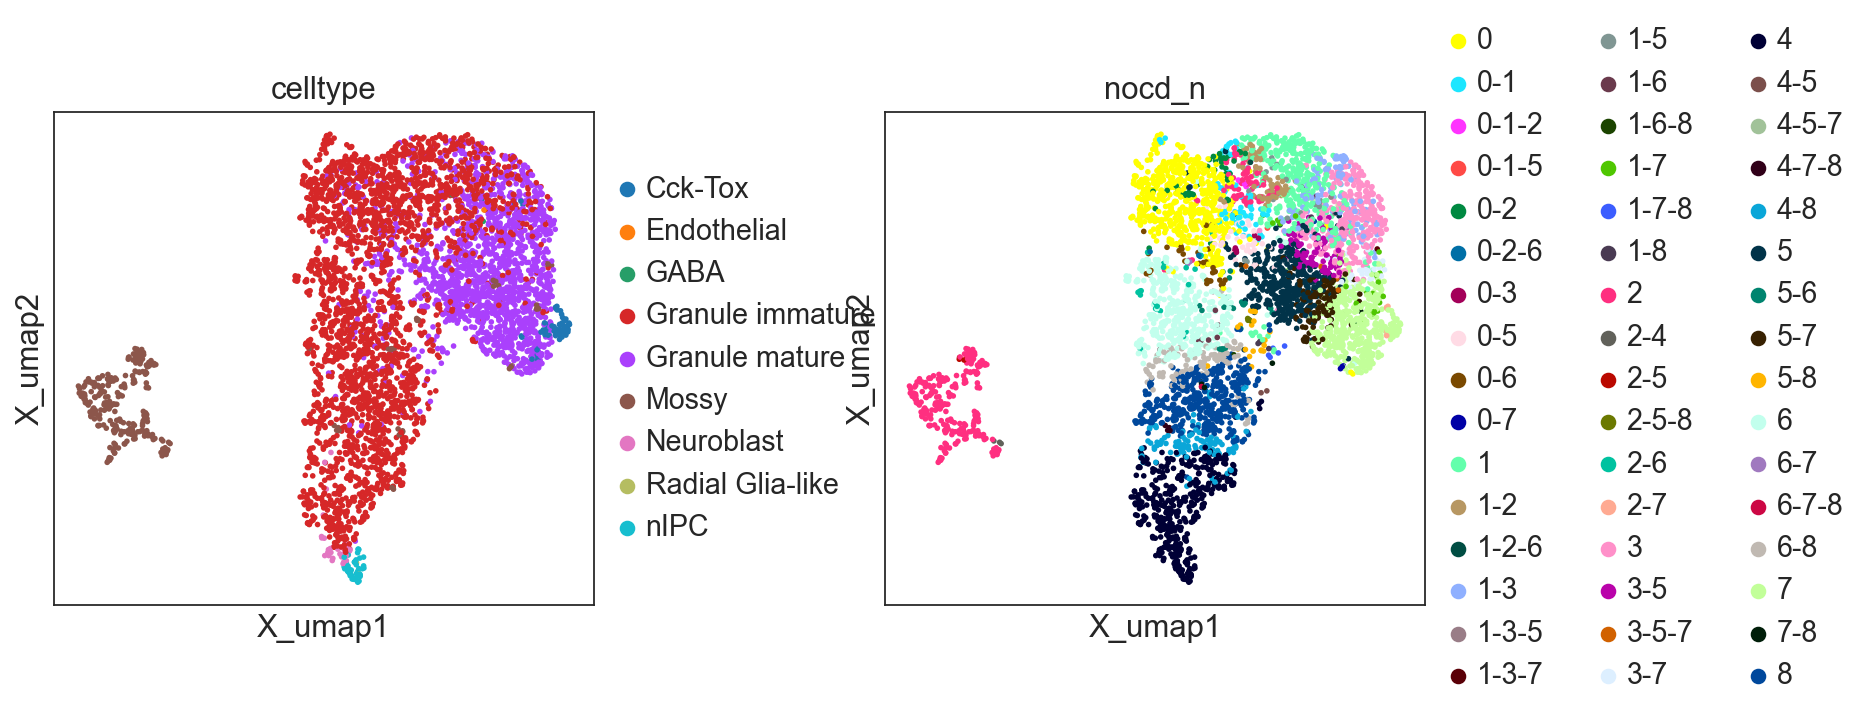

In [39]:
sc.pl.embedding(bulktb.nocd_obj.adata[bulktb.nocd_obj.adata.obs['leiden'].isin(bulktb.nocd_obj.adata.obs['leiden'].value_counts()[:100].index)],
                basis='X_umap',color=['celltype','nocd_n'],wspace=0.4,
          )

In [14]:
adata_t=ov.pp.preprocess(adata,mode='shiftlog|pearson',n_HVGs=3000,
                      target_sum=1e4)

Begin robust gene identification
After filtration, 13264/13913 genes are kept. Among 13264 genes, 13189 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['Hba-a1', 'Malat1', 'Ptgds', 'Hbb-bt']
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
End of size normalization: shiftlog and HVGs selection pearson


In [15]:
cor_pd=ov.bulk2single.bulk2single_plot_correlation(adata_t,test_adata,celltype_key='celltype',
                                           return_table=True)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


In [16]:
len(set(test_adata.obs['celltype']))

14

In [17]:
#sc.tl.rank_genes_groups(single_data, celltype_key, method='wilcoxon')
marker_df = pd.DataFrame(adata_t.uns['rank_genes_groups']['names']).head(200)
#marker = list(set(np.unique(np.ravel(np.array(marker_df))))&set(generate_adata.var.index.tolist()))
marker = list(set(np.unique(np.ravel(np.array(marker_df))))&set(test_adata.var.index.tolist()))

# the mean expression of 200 marker genes of input sc data
sc_marker = adata_t[:,marker].to_df()
sc_marker['celltype'] = adata_t.obs['celltype']
sc_marker_mean = sc_marker.groupby('celltype')[marker].mean()

In [18]:
generate_sc_data_new = test_adata[:,marker].to_df()
generate_sc_data_new['celltype'] = test_adata.obs['celltype']
generate_sc_marker_mean = generate_sc_data_new.groupby('celltype')[marker].mean()

intersect_cell = list(set(sc_marker_mean.index).intersection(set(generate_sc_marker_mean.index)))
generate_sc_marker_mean= generate_sc_marker_mean.loc[intersect_cell]
sc_marker_mean= sc_marker_mean.loc[intersect_cell]

In [19]:
sc_marker_mean=sc_marker_mean.T

In [20]:
rf_ct = list(sc_marker_mean.columns)
rf_ct

['Granule mature',
 'Granule immature',
 'Cck-Tox',
 'OPC',
 'Neuroblast',
 'nIPC',
 'Astrocytes',
 'Cajal Retzius',
 'GABA',
 'Microglia',
 'Endothelial',
 'OL',
 'Mossy',
 'Radial Glia-like']

In [21]:
cor_pd.shape

(14, 14)

In [22]:
cor_pd=pd.DataFrame(cor_pd,
                   index=rf_ct,
                   columns=rf_ct)

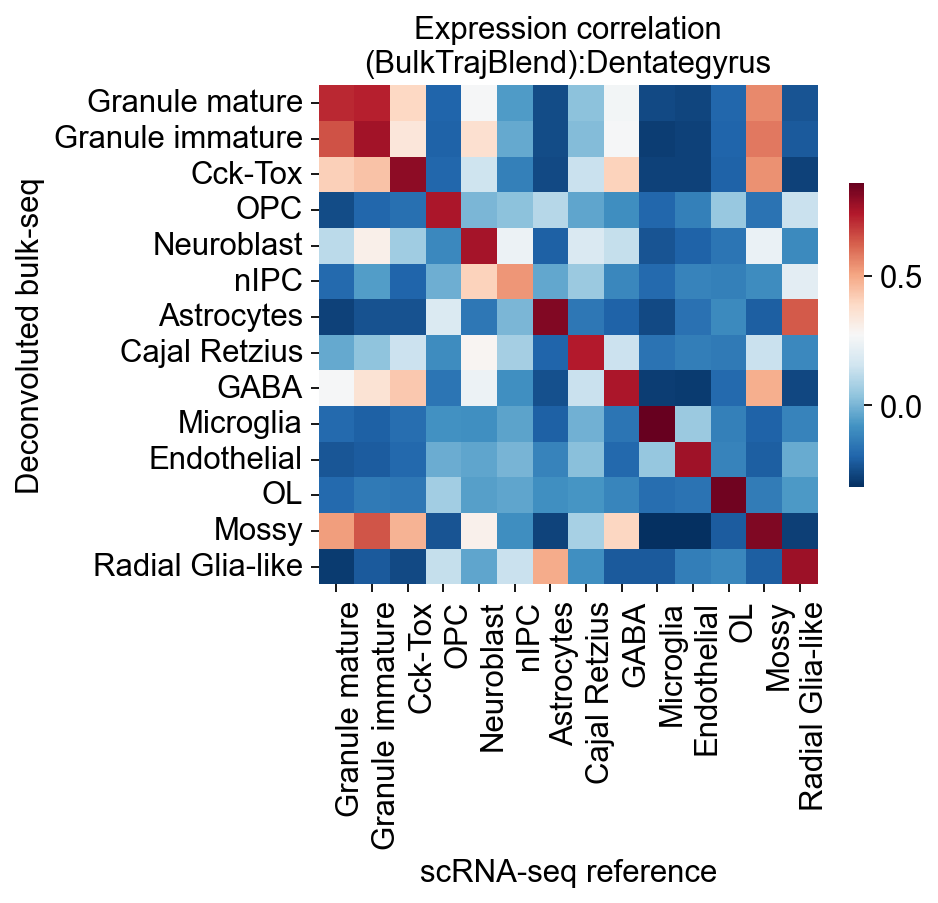

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cor_pd,cmap='RdBu_r',cbar_kws={'shrink':0.5},
           square=True,xticklabels=True,yticklabels=True,)
plt.xlabel("scRNA-seq reference")
plt.ylabel("Deconvoluted bulk-seq")
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
#plt.colorbar(im)
ax.set_title("Expression correlation\n(BulkTrajBlend):Dentategyrus")
plt.savefig('figures/heatmap_expcor_btb_dg.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/heatmap_expcor_btb_dg.pdf',dpi=300,bbox_inches='tight')


In [24]:
cmk1=ov.single.get_celltype_marker(test_adata,clustertype='celltype',
                                  scores_type='logfoldchanges')

...get cell type marker
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


In [25]:
adata_hpc1=ov.pp.preprocess(adata,mode='shiftlog|pearson',n_HVGs=3000,
                      target_sum=1e4)

Begin robust gene identification
After filtration, 13264/13264 genes are kept. Among 13264 genes, 13189 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['Hba-a1', 'Malat1', 'Ptgds', 'Hbb-bt']
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
End of size normalization: shiftlog and HVGs selection pearson


In [26]:
cmk2=ov.single.get_celltype_marker(adata_hpc1,clustertype='celltype',
                                  scores_type='logfoldchanges')

...get cell type marker
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


In [27]:
cmk1={}
for clt in test_adata.obs['celltype'].cat.categories:
    degs = sc.get.rank_genes_groups_df(test_adata, group=clt, 
                                       key='rank_genes_groups', log2fc_min=2, 
                                       pval_cutoff=0.05)
    cmk1[clt]=degs['names'][:300].tolist()

In [28]:
cmk2={}
for clt in adata_hpc1.obs['celltype'].cat.categories:
    degs = sc.get.rank_genes_groups_df(adata_hpc1, group=clt, 
                                       key='rank_genes_groups', log2fc_min=2, 
                                       pval_cutoff=0.05)
    cmk2[clt]=degs['names'][:300].tolist()

In [29]:
all_gene=[]
for clt in cmk1.keys():
    all_gene+=cmk1[clt]
for clt in cmk2.keys():
    all_gene+=cmk2[clt]
all_gene=list(set(all_gene))

In [30]:
cmk1_pd=pd.DataFrame(index=all_gene)
for clt in cmk1.keys():
    cmk1_pd[clt]=0
    cmk1_pd.loc[cmk1[clt],clt]=1
cmk2_pd=pd.DataFrame(index=all_gene)
for clt in cmk2.keys():
    cmk2_pd[clt]=0
    cmk2_pd.loc[cmk2[clt],clt]=1

In [31]:
from scipy import spatial
plot_data=pd.DataFrame(index=test_adata.obs['celltype'].cat.categories,
                      columns=test_adata.obs['celltype'].cat.categories)
for clt1 in cmk1.keys():
    for clt2 in cmk1.keys():
    #print(clt,1 - spatial.distance.cosine(cmk1_pd['B'], cmk2_pd[clt]))
        plot_data.loc[clt1,clt2]=1 - spatial.distance.cosine(cmk1_pd[clt1], cmk2_pd[clt2])

In [32]:
plot_data=plot_data.astype(float)

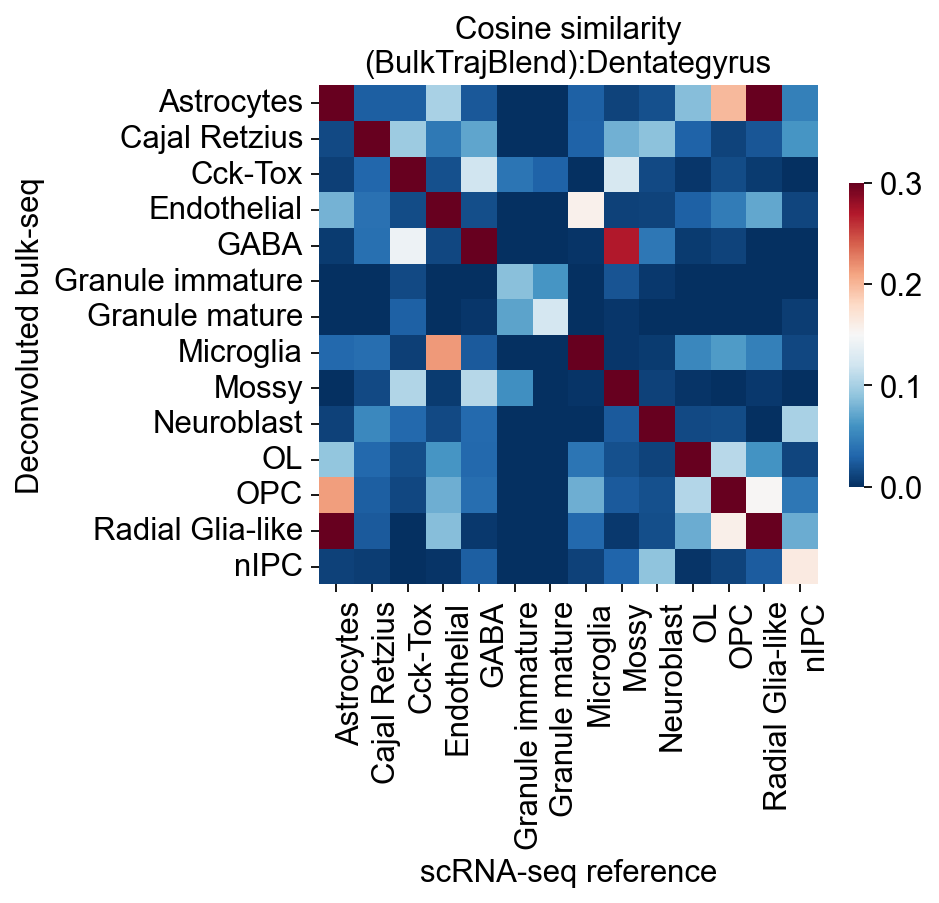

In [78]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(plot_data,cmap='RdBu_r',cbar_kws={'shrink':0.5},
           square=True,xticklabels=True,yticklabels=True,vmax=0.3)
plt.xlabel("scRNA-seq reference")
plt.ylabel("Deconvoluted bulk-seq")
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
#plt.colorbar(im)
ax.set_title("Cosine similarity\n(BulkTrajBlend):Dentategyrus")
plt.savefig('figures/heatmap_cossim_btb_dg.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/heatmap_cossim_btb_dg.pdf',dpi=300,bbox_inches='tight')


In [34]:
# 计算对角线均值
diagonal_mean = np.trace(cor_pd.values) / len(cor_pd)

# 计算非对角线均值
non_diagonal_mean = (np.sum(cor_pd.values) - np.trace(cor_pd.values)) / (len(cor_pd)**2 - len(cor_pd))

print("对角线均值:", diagonal_mean)
print("非对角线均值:", non_diagonal_mean)

对角线均值: 0.7619322234998875
非对角线均值: -0.023481963323728483


In [35]:
# 计算对角线均值
diagonal_mean = np.trace(plot_data.values) / len(plot_data)

# 计算非对角线均值
non_diagonal_mean = (np.sum(plot_data.values) - np.trace(plot_data.values)) / (len(plot_data)**2 - len(plot_data))

print("对角线均值:", diagonal_mean)
print("非对角线均值:", non_diagonal_mean)

对角线均值: 0.5237426055484475
非对角线均值: 0.036936002538840496


In [36]:
bulktb.gnn_configure(max_epochs=2000)

torch have been install version: 2.0.1


In [37]:
bulktb.gnn_train()

Epoch  950, loss.full = 0.1570, nmi = 0.59:   0%|          | 0/2000 [00:21<?, ?it/s]


Breaking due to early stopping at epoch 950
Final nmi = 0.615
......add nocd result to adata.obs
...save trained gnn in save_model/gnn.pth.


In [38]:
res_pd=bulktb.gnn_generate()
res_pd.head()

The nocd result is  nocd_Granule immature      145
nocd_OPC                   111
nocd_Cck-Tox               181
nocd_Endothelial            41
nocd_Granule immature_1    135
nocd_Mossy                  84
nocd_Radial Glia-like       98
nocd_GABA                   95
nocd_Neuroblast            135
nocd_Microglia             101
nocd_Endothelial_1          70
nocd_OL                     98
nocd_Astrocytes            104
nocd_Cajal Retzius         123
dtype: int64
The nocd result has been added to adata.obs['nocd_']


nocd_Granule immature  nocd_OPC  nocd_Cck-Tox  nocd_Endothelial  \
C_1                      0         0             0                 1   
C_2                      0         0             1                 0   
C_3                      0         0             0                 0   
C_4                      0         0             0                 0   
C_5                      0         0             0                 0   

     nocd_Granule immature_1  nocd_Mossy  nocd_Radial Glia-like  nocd_GABA  \
C_1                        0           0                      0          0   
C_2                        1           0                      0          0   
C_3                        1           0                      0          0   
C_4                        0           0                      0          0   
C_5                        0           0                      0          0   

     nocd_Neuroblast  nocd_Microglia  nocd_Endothelial_1  nocd_OL  \
C_1                0               0                   0        0   
C_2                0               0                   0        0   
C_3                0               0                   0        0   
C_4                0               1                   0        0   
C_5                0               1                   0        0   

     nocd_Astrocytes  nocd_Cajal Retzius  
C_1                0                   0  
C_2                0                   0  
C_3                0                   0  
C_4                0                   0  
C_5                0                   0

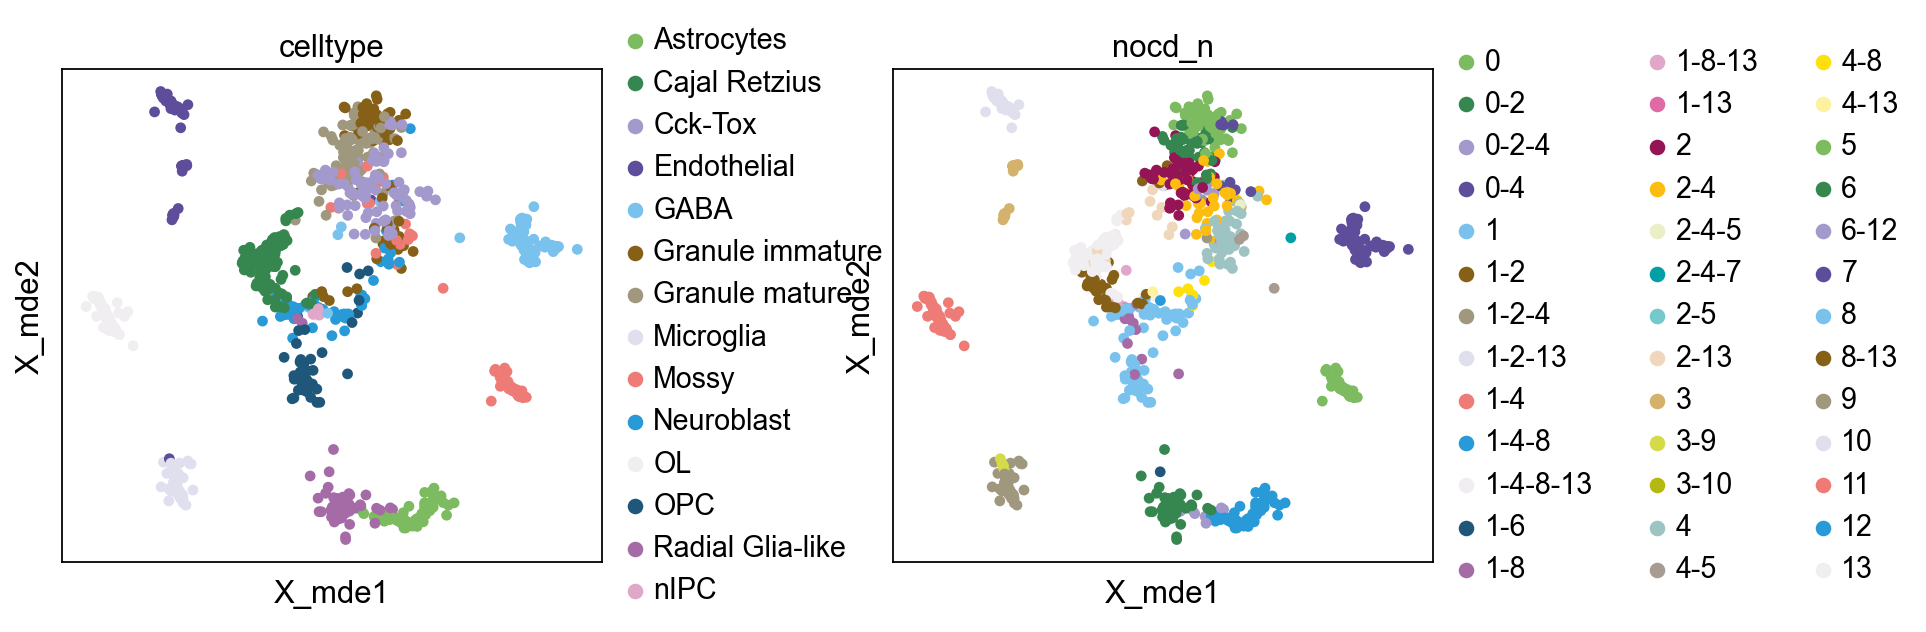

In [39]:
bulktb.nocd_obj.adata.obsm["X_mde"] = mde(bulktb.nocd_obj.adata.obsm["X_pca"])
sc.pl.embedding(bulktb.nocd_obj.adata,basis='X_mde',color=['celltype','nocd_n'],wspace=0.4,
          palette=ov.utils.pyomic_palette())

In [40]:
print('raw cells: ',bulktb.single_seq.shape[0])
#adata1=bulktb.interpolation('Neuroblast')
adata1=bulktb.interpolation('OPC')
print('interpolation cells: ',adata1.shape[0])

raw cells:  2930
interpolation cells:  3041


In [41]:
adata3=test_adata[test_adata.obs['celltype']=='OPC']
adata3

View of AnnData object with n_obs × n_vars = 80 × 1597
    obs: 'celltype', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca', 'neighbors', 'leiden', 'rank_genes_groups'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [65]:
import anndata
adata1=anndata.concat([bulktb.vae_model.single_data,adata3],
                     merge='same')
adata1

AnnData object with n_obs × n_vars = 3122 × 1607
    obs: 'celltype'

In [42]:
ov.pp.scale(adata1)
ov.pp.pca(adata1,layer='scaled',n_pcs=50)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [43]:
adata1.obsm["X_mde"] = ov.utils.mde(adata1.obsm["scaled|original|X_pca"])
adata1

AnnData object with n_obs × n_vars = 3041 × 12953
    obs: 'celltype'
    uns: 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues'
    obsm: 'scaled|original|X_pca', 'X_mde'
    varm: 'scaled|original|pca_loadings'
    layers: 'scaled', 'lognorm'

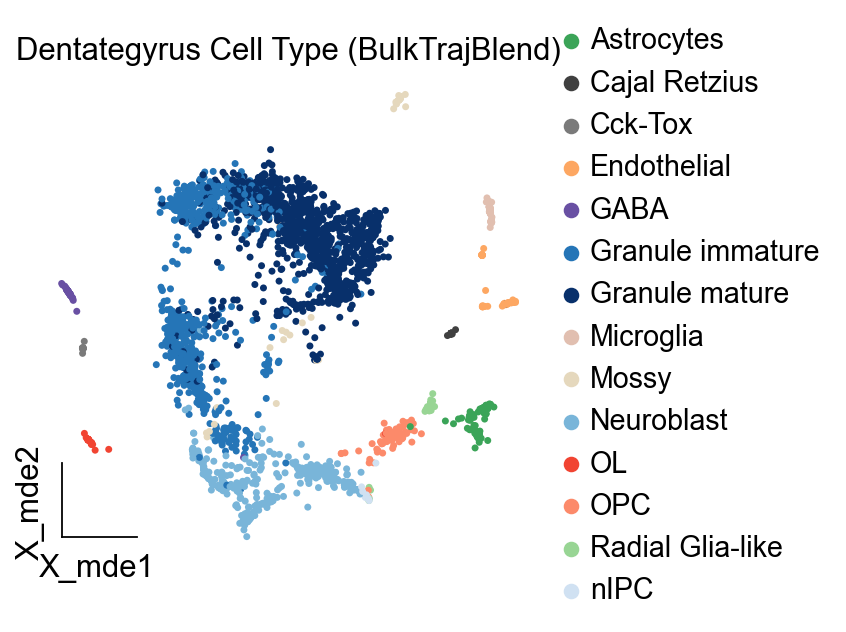

In [44]:
ov.utils.embedding(adata1,
                basis='X_mde',
           color=['celltype'],title='Dentategyrus Cell Type (BulkTrajBlend)',
                   frameon='small',show=False,
           wspace=0.4,palette=adata.uns['clusters_colors'].tolist())
plt.savefig('figures/umap_dg_btb.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/umap_dg_btb.pdf',dpi=300,bbox_inches='tight')


In [45]:
adata2=bulktb.vae_model.single_data.copy()

In [46]:
adata2.raw = adata2
sc.pp.highly_variable_genes(adata2, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata2 = adata2[:, adata2.var.highly_variable]

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [47]:
ov.pp.scale(adata2)
ov.pp.pca(adata2,layer='scaled',n_pcs=50)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [48]:
adata2.obsm["X_mde"] = ov.utils.mde(adata2.obsm["scaled|original|X_pca"])
adata2

AnnData object with n_obs × n_vars = 2930 × 2254
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters_colors', 'log1p', 'hvg', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues'
    obsm: 'X_umap', 'scaled|original|X_pca', 'X_mde'
    varm: 'scaled|original|pca_loadings'
    layers: 'ambiguous', 'spliced', 'unspliced', 'scaled', 'lognorm'

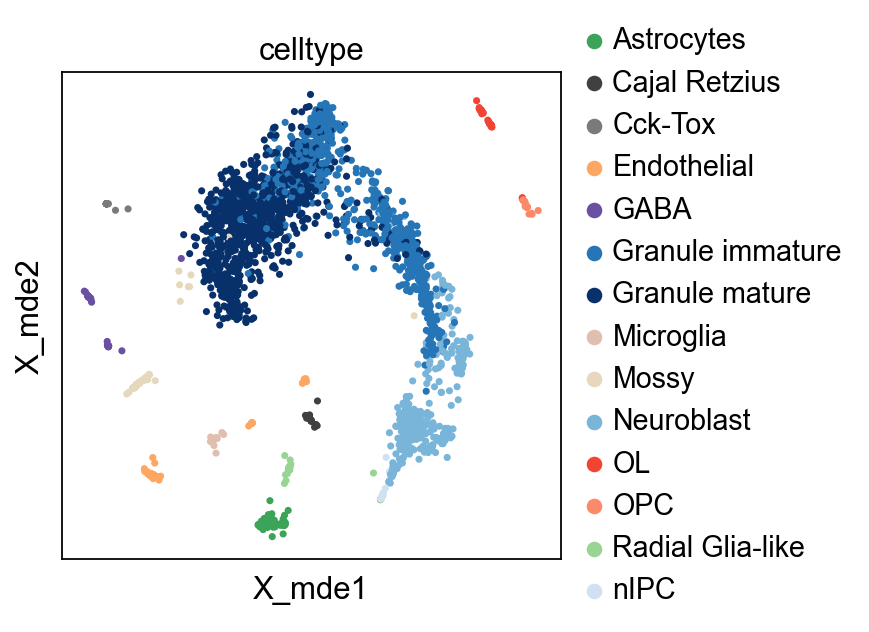

In [49]:
sc.pl.embedding(adata2,
                basis='X_mde',
           color=['celltype'],
           wspace=0.4,palette=adata.uns['clusters_colors'].tolist())

In [50]:
v0 = ov.single.pyVIA(adata=adata2,adata_key='scaled|original|X_pca',adata_ncomps=100, basis='X_mde',
                         clusters='celltype',knn=15,random_seed=4,root_user=['nIPC'],
                    dataset='group')
v0.run()

2023-10-05 16:47:59.534744	Running VIA over input data of 2930 (samples) x 50 (features)
2023-10-05 16:47:59.534904	Knngraph has 15 neighbors
2023-10-05 16:48:00.401299	Finished global pruning of 15-knn graph used for clustering at level of 0.15. Kept 39.6 % of edges. 
2023-10-05 16:48:00.409944	Number of connected components used for clustergraph  is 1
2023-10-05 16:48:00.448704	Commencing community detection
2023-10-05 16:48:00.585249	Finished running Leiden algorithm. Found 620 clusters.
2023-10-05 16:48:00.585944	Merging 590 very small clusters (<10)
2023-10-05 16:48:00.589996	Finished detecting communities. Found 52 communities
2023-10-05 16:48:00.590134	Making cluster graph. Global cluster graph pruning level: 0.15
2023-10-05 16:48:00.594116	Graph has 1 connected components before pruning
2023-10-05 16:48:00.595987	Graph has 15 connected components after pruning
2023-10-05 16:48:00.604593	Graph has 1 connected components after reconnecting
2023-10-05 16:48:00.605104	2.1% links tr

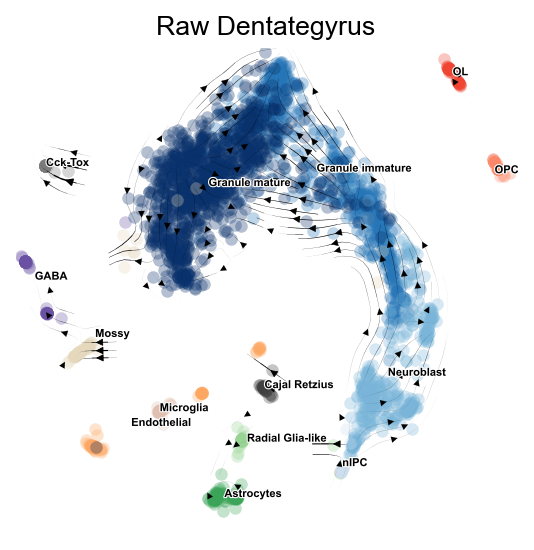

In [51]:
import matplotlib.pyplot as plt
fig,ax=v0.plot_stream(basis='X_mde',clusters='celltype',
               density_grid=0.8, scatter_size=30, scatter_alpha=0.3, linewidth=0.5)
plt.title('Raw Dentategyrus',fontsize=12)
plt.savefig('figures/via_dg_raw2.png',dpi=300,bbox_inches='tight')

In [52]:
v0.get_pseudotime(adata2)
sc.pp.neighbors(adata2,n_neighbors= 15,use_rep='scaled|original|X_pca')
ov.utils.cal_paga(adata2,use_time_prior='pt_via',vkey='paga',
                 groups='celltype')

...the pseudotime of VIA added to AnnData obs named `pt_via`
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running PAGA using priors: ['pt_via']
    finished
added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


In [53]:
raw_transitions=pd.DataFrame(adata2.uns['paga']['transitions_confidence'].toarray(),
            index=adata2.obs['celltype'].cat.categories,
            columns=adata2.obs['celltype'].cat.categories)

In [54]:
raw_transitions.loc['nIPC','OPC']

0.0

In [59]:
v1 = ov.single.pyVIA(adata=adata1,adata_key='scaled|original|X_pca',adata_ncomps=100, basis='X_mde',
                         clusters='celltype',knn=10,random_seed=112,
                     )
v1.run()

2023-10-05 16:49:14.318371	Running VIA over input data of 3041 (samples) x 50 (features)
2023-10-05 16:49:14.318419	Knngraph has 10 neighbors
2023-10-05 16:49:15.159255	Finished global pruning of 10-knn graph used for clustering at level of 0.15. Kept 43.7 % of edges. 
2023-10-05 16:49:15.167312	Number of connected components used for clustergraph  is 3
2023-10-05 16:49:15.192210	Commencing community detection
2023-10-05 16:49:15.324363	Finished running Leiden algorithm. Found 544 clusters.
2023-10-05 16:49:15.325151	Merging 503 very small clusters (<10)
2023-10-05 16:49:15.330460	Finished detecting communities. Found 43 communities
2023-10-05 16:49:15.330616	Making cluster graph. Global cluster graph pruning level: 0.15
2023-10-05 16:49:15.334025	Graph has 3 connected components before pruning
2023-10-05 16:49:15.336087	Graph has 13 connected components after pruning
2023-10-05 16:49:15.342590	Graph has 3 connected components after reconnecting
2023-10-05 16:49:15.343060	0.0% links tr

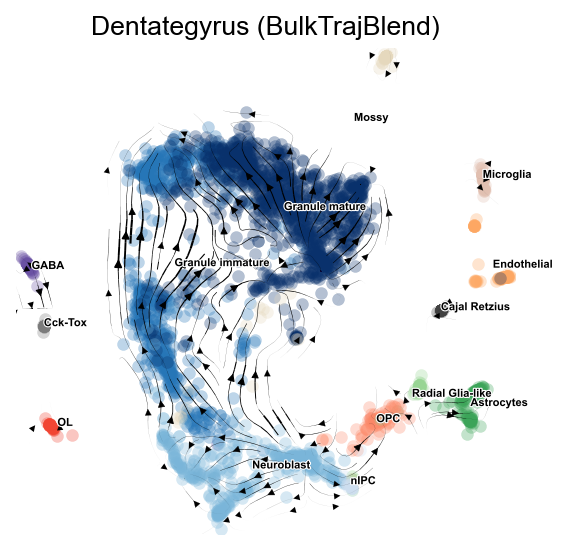

In [60]:
import matplotlib.pyplot as plt
fig,ax=v1.plot_stream(basis='X_mde',clusters='celltype',
               density_grid=0.8, scatter_size=30, scatter_alpha=0.3, linewidth=0.5)
plt.title('Dentategyrus (BulkTrajBlend)',fontsize=12)
plt.savefig('figures/via_dg_btb.png',dpi=300,bbox_inches='tight')

<AxesSubplot: title={'center': 'PAGA LTNN-graph'}>

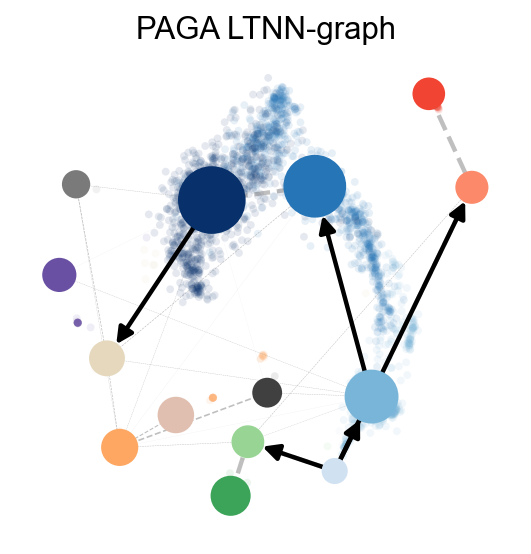

In [61]:
ov.utils.plot_paga(adata2,basis='mde', size=50, alpha=.1,title='PAGA LTNN-graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)

In [62]:
v1.get_pseudotime(adata1)
sc.pp.neighbors(adata1,n_neighbors= 15,use_rep='scaled|original|X_pca')
ov.utils.cal_paga(adata1,use_time_prior='pt_via',vkey='paga',
                 groups='celltype')

...the pseudotime of VIA added to AnnData obs named `pt_via`
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running PAGA using priors: ['pt_via']
    finished
added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


In [63]:
after_transitions=pd.DataFrame(adata1.uns['paga']['transitions_confidence'].toarray(),
            index=adata1.obs['celltype'].cat.categories,
            columns=adata1.obs['celltype'].cat.categories)

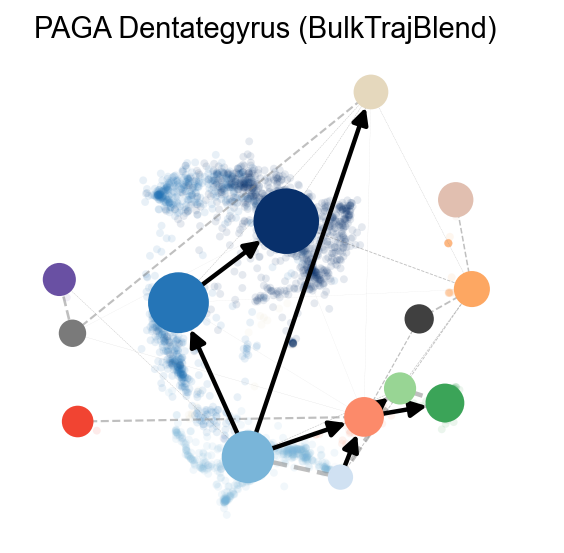

In [64]:
ov.utils.plot_paga(adata1,basis='mde', size=50, alpha=.1,title='PAGA LTNN-graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)
plt.title('PAGA Dentategyrus (BulkTrajBlend)',fontsize=13)
plt.savefig('figures/paga_dg_btb.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/paga_dg_btb.pdf',dpi=300,bbox_inches='tight')

(0.0, 1.0)

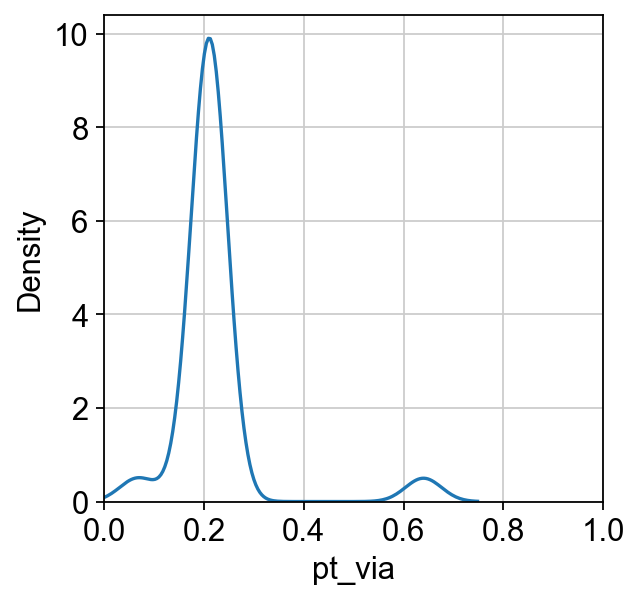

In [65]:
import seaborn as sns
sns.kdeplot(adata1.obs.loc[adata1.obs['celltype']=='OPC'],x='pt_via')
plt.xlim(0,1)

In [66]:
np.var(adata1.obs.loc[adata1.obs['celltype']=='OPC','pt_via'])

0.009138208570824211

(0.0, 1.0)

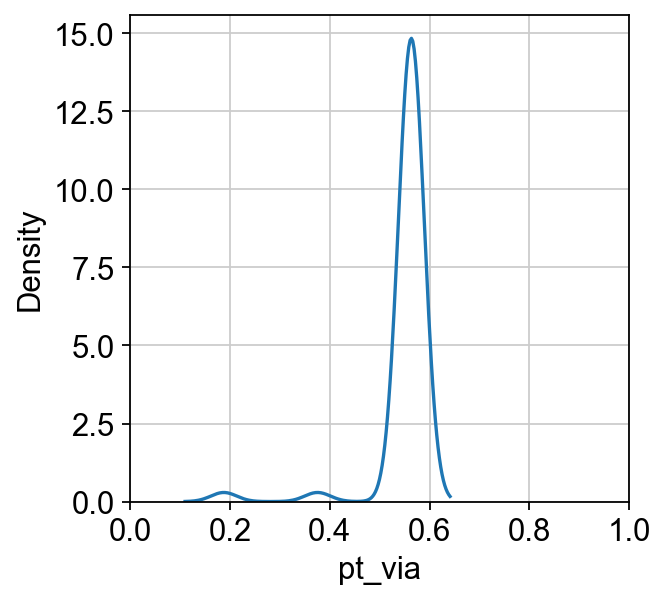

In [67]:
import seaborn as sns
sns.kdeplot(adata2.obs.loc[adata2.obs['celltype']=='OPC'],x='pt_via')
plt.xlim(0,1)

In [97]:
np.var(adata2.obs.loc[adata2.obs['celltype']=='OPC','pt_via'])

0.0032140483463246024

In [74]:
res_dict={}

#Cor:exp
# 计算对角线均值
diagonal_mean = np.trace(cor_pd.values) / len(cor_pd)
# 计算非对角线均值
non_diagonal_mean = (np.sum(cor_pd.values) - np.trace(cor_pd.values)) / (len(cor_pd)**2 - len(cor_pd))

res_dict['Cor_mean']=diagonal_mean
res_dict['non_Cor_mean']=non_diagonal_mean

#Cos:gene
# 计算对角线均值
diagonal_mean = np.trace(plot_data.values) / len(plot_data)

# 计算非对角线均值
non_diagonal_mean = (np.sum(plot_data.values) - np.trace(plot_data.values)) / (len(plot_data)**2 - len(plot_data))

res_dict['Cos_mean']=diagonal_mean
res_dict['non_Cos_mean']=non_diagonal_mean

#raw:trans
res_dict['Trans_raw']=raw_transitions.loc['OPC'].max()
res_dict['Trans_after']=after_transitions.loc['OPC'].max()


#Variance
res_dict['Var_raw']=np.var(adata2.obs.loc[adata2.obs['celltype']=='OPC','pt_via'])
res_dict['Var_after']=np.var(adata1.obs.loc[adata1.obs['celltype']=='OPC','pt_via'])


In [75]:
res_dict

{'Cor_mean': 0.7619322234998875,
 'non_Cor_mean': -0.023481963323728483,
 'Cos_mean': 0.5237426055484475,
 'non_Cos_mean': 0.036936002538840496,
 'Trans_raw': 0.012605069833265089,
 'Trans_after': 0.029339339664398403,
 'Var_raw': 0.0032140483463246024,
 'Var_after': 0.009138208570824211}

In [76]:
import pickle
with open('result/metric_btb_dg.pkl','wb') as f:
    pickle.dump(res_dict,f)

In [77]:
with open('result/metric_btb_dg.pkl','rb') as f:
    res_dict=pickle.load(f)
res_dict

{'Cor_mean': 0.7619322234998875,
 'non_Cor_mean': -0.023481963323728483,
 'Cos_mean': 0.5237426055484475,
 'non_Cos_mean': 0.036936002538840496,
 'Trans_raw': 0.012605069833265089,
 'Trans_after': 0.029339339664398403,
 'Var_raw': 0.0032140483463246024,
 'Var_after': 0.009138208570824211}